In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv('churn.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Displays the column names

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see the datatypes of the columns

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NUll values in the dataset

<AxesSubplot:xlabel='Churn', ylabel='count'>

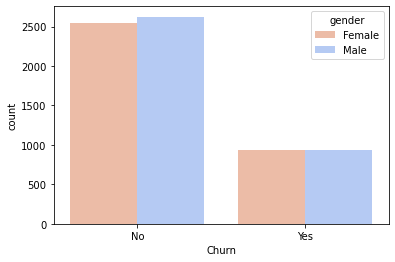

In [9]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

<AxesSubplot:xlabel='Churn', ylabel='count'>

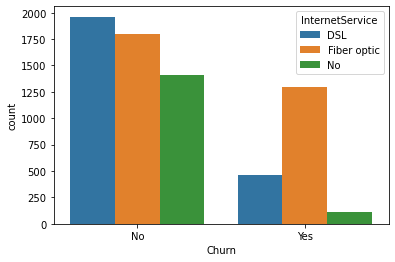

In [10]:
sns.countplot(x='Churn',data=df, hue='InternetService')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

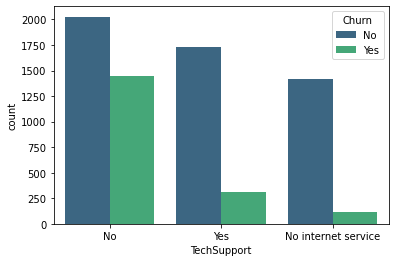

In [11]:
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

Those customers who don’t have tech support have churned more, which is
pretty self-explanatory. This also highlights the fact that the tech
support provided by the company is up to the mark.

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

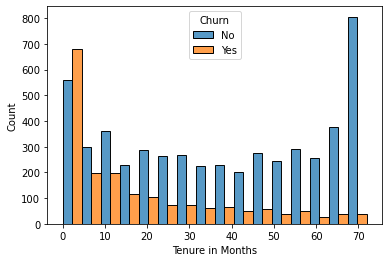

In [12]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

The churn amount is higher in the initial 5 months, which is usually the
time when the new customers try out the service and decide whether to
continue or cancel. This pretty much can be attributed to the
uncertainty in the customer’s mind.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

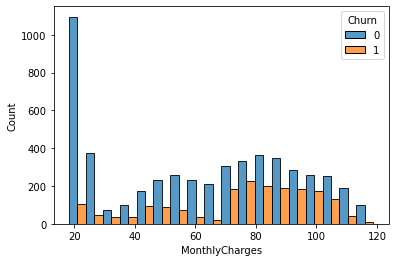

In [134]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

We cannot see a definite pattern in this, but we can conclude that those who have monthly charges as high as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high paying customers.

# Encoding the columns

In [17]:
le=LabelEncoder()
df['customerID']=le.fit_transform(df['customerID'])
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])

df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])

df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])
df['Churn']=le.fit_transform(df['Churn'])





In [18]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

Datatypes of the columns after encoding

In [83]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The Churn is the target variable and is a classificatiob problem

# Checking Correlation

<AxesSubplot:>

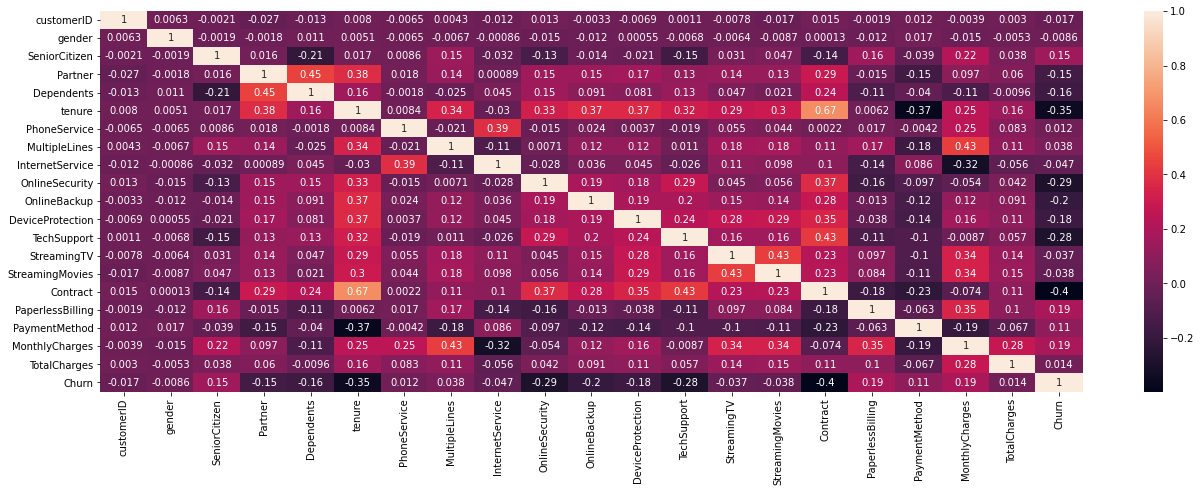

In [21]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)

Lighter shades are highly correlated

<function matplotlib.pyplot.show(close=None, block=None)>

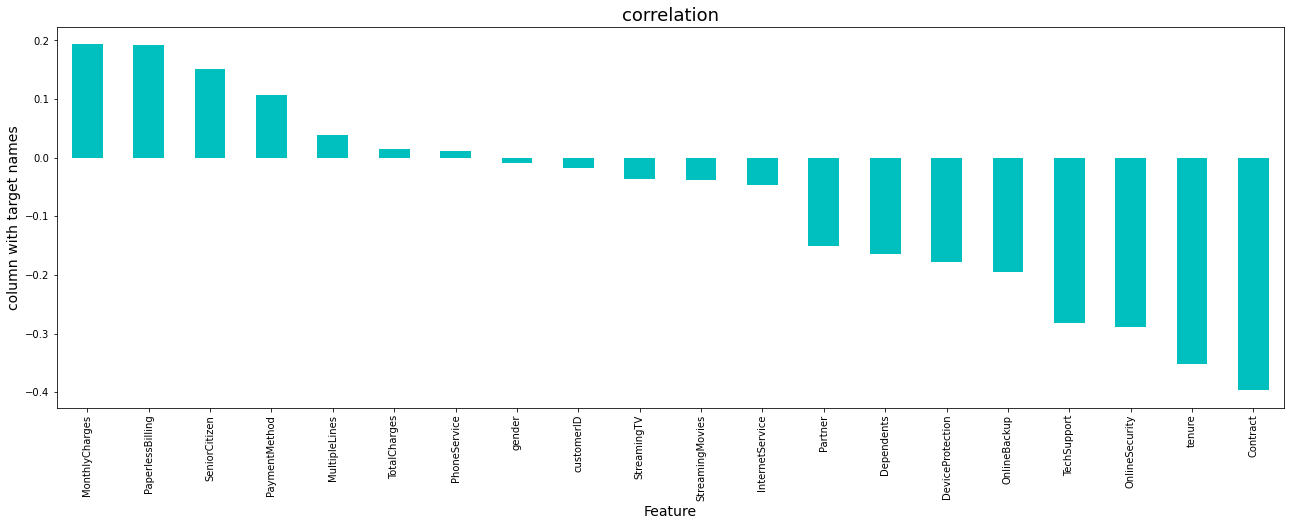

In [22]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

The above graph shows the positively and negatively correlate columns to the target variable

# Splitting the input and target variable

In [25]:
x=df.iloc[:,:-1]
y=df['Churn']

# Checking variance_inflation_factor

In [26]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [27]:
calc_vif(x)

,variables,VIF FACTOR
0,customerID,3.556480
1,gender,1.942648
2,SeniorCitizen,1.367362
3,Partner,2.821161
4,Dependents,1.955470
5,tenure,7.488342
6,PhoneService,14.530031
7,MultipleLines,2.755460
8,InternetService,4.331303
9,OnlineSecurity,2.260538


# Dropping MonthlyCharges column

In [28]:

x=df.drop(['MonthlyCharges'],axis=1)

In [29]:
calc_vif(x)

,variables,VIF FACTOR
0,customerID,3.557502
1,gender,1.943824
2,SeniorCitizen,1.353509
3,Partner,2.817854
4,Dependents,1.950279
5,tenure,7.461755
6,PhoneService,9.299207
7,MultipleLines,2.457437
8,InternetService,3.122883
9,OnlineSecurity,2.272728


# Scaling the input variable

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Balancing the target variable

In [85]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [86]:
trainy.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

The target variable is balanced after applyong the SMOTE Technique

# Model selection

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainx,trainy, test_size=0.3, random_state=41)

# LogisticRegression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
acc=accuracy_score(y_test,prediction_logreg)

In [89]:
acc

1.0

In [90]:
confusion_matrix(y_test,prediction_logreg)

array([[1564,    0],
       [   0, 1541]], dtype=int64)

In [92]:
classification_report(y_test,prediction_logreg)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1564\n           1       1.00      1.00      1.00      1541\n\n    accuracy                           1.00      3105\n   macro avg       1.00      1.00      1.00      3105\nweighted avg       1.00      1.00      1.00      3105\n'

The accuracy score is 100%

# SVC

In [93]:
from sklearn.svm import SVC

In [94]:
svc=SVC(kernel='poly')

In [95]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [96]:
Pred=svc.predict(X_test)

In [97]:
Pred

array([1, 1, 0, ..., 1, 0, 0])

In [98]:
acc=accuracy_score(y_test,Pred)

In [99]:
acc

1.0

In [100]:
confusion_matrix(y_test,Pred)

array([[1564,    0],
       [   0, 1541]], dtype=int64)

In [101]:
classification_report(y_test,Pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1564\n           1       1.00      1.00      1.00      1541\n\n    accuracy                           1.00      3105\n   macro avg       1.00      1.00      1.00      3105\nweighted avg       1.00      1.00      1.00      3105\n'

The accuracy score is 100%

# KNeighborsClassifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier(n_neighbors=5)

In [104]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [105]:
Pred=knn.predict(X_test)

In [106]:
Pred

array([1, 1, 0, ..., 1, 0, 0])

In [107]:
acc=accuracy_score(y_test,Pred)

In [108]:
acc

0.9826086956521739

In [109]:
confusion_matrix(y_test,Pred)

array([[1516,   48],
       [   6, 1535]], dtype=int64)

In [110]:
classification_report(y_test,Pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.98      1564\n           1       0.97      1.00      0.98      1541\n\n    accuracy                           0.98      3105\n   macro avg       0.98      0.98      0.98      3105\nweighted avg       0.98      0.98      0.98      3105\n'

The accuracy score ois 98%

# DecisionTreeClassifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtc=DecisionTreeClassifier()

In [113]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
pred=dtc.predict(X_test)

In [115]:
accuracy_score(y_test,pred)

1.0

In [116]:
confusion_matrix(y_test,pred)

array([[1564,    0],
       [   0, 1541]], dtype=int64)

In [117]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1564\n           1       1.00      1.00      1.00      1541\n\n    accuracy                           1.00      3105\n   macro avg       1.00      1.00      1.00      3105\nweighted avg       1.00      1.00      1.00      3105\n'

The accuracy score is 100%

# cross_val_score

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
print(cross_val_score(dtc,X_train,y_train,cv=5).mean())

1.0


In [120]:
print(cross_val_score(svc,X_train,y_train,cv=5).mean())

1.0


In [121]:
print(cross_val_score(knn,X_train,y_train,cv=5).mean())

0.9817756768813698


In [122]:
print(cross_val_score(lr,X_train,y_train,cv=5).mean())

1.0


Comparing the Accuracy scores and CV scores of different models DEcision tree classifier is the best

# GridSearchCV

In [123]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [124]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini', 'entropy'],
          'splitter':['best', 'random'],
          'max_features':['auto','sqrt','log2']}

In [125]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [128]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [129]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [132]:
Final_model=DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='sqrt',splitter='random')
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test) 
acc=accuracy_score(y_test,pred)

In [133]:
acc

1.0

# Conclusion:The accuracy score for Decision tree classifier is 100% and it is the best model